In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML


In [2]:
# The function below is useful when I disply dataframes.
# We can display multiple dataframes side by side.
def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

In [3]:
roles = {"duelist": {"jett", "phoenix", "reyna", "raze", "yoru", "neon", "iso"},
             "initiator": {"sova", "breach", "skye", "kayo", "fade", "gekko"},
             "controller": {"brimstone", "omen", "viper", "astra", "harbor"},
             "sentinel": {"cypher", "sage", "killjoy", "chamber", "deadlock"}}
allagents = set()
for role, l in roles.items():
    allagents = allagents.union(set(l))

allagents

{'astra',
 'breach',
 'brimstone',
 'chamber',
 'cypher',
 'deadlock',
 'fade',
 'gekko',
 'harbor',
 'iso',
 'jett',
 'kayo',
 'killjoy',
 'neon',
 'omen',
 'phoenix',
 'raze',
 'reyna',
 'sage',
 'skye',
 'sova',
 'viper',
 'yoru'}

In [4]:
players_stats = pd.read_csv("../../vct-erdos-project/data/vct_2023/players_stats/players_stats.csv")
overview = pd.read_csv("../../vct-erdos-project/data/vct_2023/matches/overview.csv")
maps_scores = pd.read_csv("../../vct-erdos-project/data/vct_2023/matches/maps_scores.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../../vct-erdos-project/data/vct_2023/players_stats/players_stats.csv'

In [5]:
players_stats.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Player', 'Team', 'Agents',
       'Rounds Played', 'Rating', 'Average Combat Score', 'Kills:Deaths',
       'Kill, Assist, Trade, Survive %', 'Average Damage Per Round',
       'Kills Per Round', 'Assists Per Round', 'First Kills Per Round',
       'First Deaths Per Round', 'Headshot %', 'Clutch Success %',
       'Clutches (won/played)', 'Maximum Kills in a Single Map', 'Kills',
       'Deaths', 'Assists', 'First Kills', 'First Deaths'],
      dtype='object')

In [6]:
players_stats = players_stats[['Tournament', 'Stage', 'Match Type', 'Player', 'Team', 'Agents', 'Rating']]

players_stats["Agents"] = players_stats["Agents"].apply(lambda x: x.replace(" ", ""))

players_stats

,Tournament,Stage,Match Type,Player,Team,Agents,Rating
0,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Melser,KRÜ Esports,brimstone,1.14
1,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Melser,KRÜ Esports,omen,1.12
2,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Melser,KRÜ Esports,"brimstone,omen",1.13
3,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,DaveeyS,KRÜ Esports,killjoy,1.29
4,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,keznit,KRÜ Esports,raze,1.24
...,...,...,...,...,...,...,...
10511,Champions Tour 2023: Champions China Qualifier,All Stages,All Match Types,Biank,Bilibili Gaming,sova,NaN
10512,Champions Tour 2023: Champions China Qualifier,All Stages,All Match Types,Biank,Bilibili Gaming,"sova,harbor,skye,fade",NaN
10513,Champions Tour 2023: Champions China Qualifier,All Stages,All Match Types,whzy,Bilibili Gaming,jett,NaN
10514,Champions Tour 2023: Champions China Qualifier,All Stages,All Match Types,whzy,Bilibili Gaming,raze,NaN


In [7]:
players_stats = players_stats[players_stats.Agents.isin(allagents)]
players_stats

,Tournament,Stage,Match Type,Player,Team,Agents,Rating
0,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Melser,KRÜ Esports,brimstone,1.14
1,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Melser,KRÜ Esports,omen,1.12
3,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,DaveeyS,KRÜ Esports,killjoy,1.29
4,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,keznit,KRÜ Esports,raze,1.24
5,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Round 1,Klaus,KRÜ Esports,skye,1.25
...,...,...,...,...,...,...,...
10509,Champions Tour 2023: Champions China Qualifier,All Stages,All Match Types,Biank,Bilibili Gaming,harbor,NaN
10510,Champions Tour 2023: Champions China Qualifier,All Stages,All Match Types,Biank,Bilibili Gaming,skye,NaN
10511,Champions Tour 2023: Champions China Qualifier,All Stages,All Match Types,Biank,Bilibili Gaming,sova,NaN
10513,Champions Tour 2023: Champions China Qualifier,All Stages,All Match Types,whzy,Bilibili Gaming,jett,NaN


In [8]:
players_stats["Rating"].isna().sum()

449

I would like to fill in a missing value with the average of the corresponding player's rating.  Grouped by from "Tournament" to "Agents".
If there is a stilling missing value, dropped "Agents" when we compute the average.  After this, if there is a still missing value, compute the average of the average of team members.

In [9]:
players_stats.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Player', 'Team', 'Agents',
       'Rating'],
      dtype='object')

In [10]:
grouped1 = players_stats.groupby(["Player", "Team", "Agents"])

In [11]:
players_stats.loc[:,"Rating"] = grouped1["Rating"].transform(lambda x: x.fillna(x.mean()))

In [12]:
players_stats.Rating.isna().sum()

111

We still have some missing ratings.  Fill these with players' average rating.

In [13]:
grouped2 = players_stats.groupby(["Player", "Team"])
players_stats["Rating"] = grouped2["Rating"].transform(lambda x: x.fillna(x.mean()))
players_stats.Rating.isna().sum()

/var/folders/5l/9ggb45sn6nzb744shb8z4c680000gn/T/ipykernel_18246/2949298896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_stats["Rating"] = grouped2["Rating"].transform(lambda x: x.fillna(x.mean()))


34

There are still some missing ratings.  Fill them with team's average rating.

In [14]:
grouped3 = players_stats.groupby(["Team"])
players_stats["Rating"] = grouped3["Rating"].transform(lambda x: x.fillna(x.mean()))
players_stats.Rating.isna().sum()

/var/folders/5l/9ggb45sn6nzb744shb8z4c680000gn/T/ipykernel_18246/4266454744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_stats["Rating"] = grouped3["Rating"].transform(lambda x: x.fillna(x.mean()))


0

Nice!  Finally, we finished filling in NaN with some sort of average.

In [15]:
players_stats = players_stats.round(3)

In [16]:
players_stats.sort_values(by=["Rating"], ascending=False).head(20)

,Tournament,Stage,Match Type,Player,Team,Agents,Rating
3264,Champions Tour 2023: EMEA League,Regular Season,Week 2,Jamppi,Team Liquid,skye,2.29
3180,Champions Tour 2023: EMEA League,Regular Season,Week 1,Sayf,Team Liquid,raze,2.25
7707,Champions Tour 2023: Pacific League,League Play,Week 3,xffero,Rex Regum Qeon,sova,2.10
531,Champions Tour 2023: Pacific Last Chance Quali...,Main Event,Lower Final,invy,Team Secret,kayo,2.08
3314,Champions Tour 2023: EMEA League,Regular Season,Week 3,Shao,Natus Vincere,fade,2.04
9355,Champions Tour 2023: Champions China Qualifier,Preliminary Stage,Round 1,Septem7,Shenzhen NTER,killjoy,1.98
6704,Champions Tour 2023: Americas League,Regular Season,Week 7,Victor,NRG Esports,raze,1.97
141,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Upper Final,NagZ,KRÜ Esports,viper,1.96
6126,Champions Tour 2023: Americas League,Regular Season,Week 2,s0m,NRG Esports,viper,1.96
7238,Champions Tour 2023: Pacific League,Playoffs,Upper Semifinals,BuZz,DRX,raze,1.95


In [17]:
overview.keys()
overview.sort_values(by=["Rating"], ascending=False).head()

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating,Average Combat Score,...,Deaths,Assists,Kills - Deaths (KD),"Kill, Assist, Trade, Survive %",Average Damage per Round,Headshot %,First Kills,First Deaths,Kills - Deaths (FKD),Side
7211,Champions Tour 2023: Champions China Qualifier,Preliminary Stage,Round 1,Shenzhen NTER vs Kingzone,Lotus,Spring,Shenzhen NTER,raze,3.53,686.0,...,0.0,1.0,5.0,100%,408.0,45%,1.0,0.0,1.0,defend
22216,Champions Tour 2023: EMEA League,Regular Season,Week 3,Team Vitality vs Karmine Corp,Ascent,Destrian,Team Vitality,omen,3.48,545.0,...,0.0,1.0,8.0,100%,356.0,38%,0.0,0.0,0.0,attack
27698,Champions Tour 2023: Pacific League,League Play,Week 4,T1 vs Gen.G,Haven,k1Ng,Gen.G,killjoy,3.42,593.0,...,0.0,4.0,13.0,100%,359.0,30%,2.0,0.0,2.0,defend
6311,Champions Tour 2023: Pacific Last Chance Quali...,Main Event,Lower Final,Team Secret vs Gen.G,Ascent,invy,Team Secret,kayo,3.16,566.0,...,1.0,4.0,6.0,100%,400.0,42%,0.0,0.0,0.0,defend
9101,Champions Tour 2023: Champions China Qualifier,Preliminary Stage,Round 4,Four Angry Men vs Invincible Gaming,Lotus,Lumo,Four Angry Men,skye,3.15,601.0,...,0.0,0.0,8.0,100%,325.0,30%,1.0,0.0,1.0,defend


Rating in overview file doesn't look right.  Rating being over 3 or near 0 is very off from normal values.
It seems players_stats is using a correct rating that is explained in vlr.gg.

In [18]:
ind1 = overview["Side"] == "both"
ind2 = overview["Map"] != "All Maps"
ind = ind1 & ind2

overview = overview[ind]
overview = overview[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Player',
       'Team', 'Agents']]
overview

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,nAts,Team Liquid,viper
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Sayf,Team Liquid,breach
6,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,soulcas,Team Liquid,astra
9,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Jamppi,Team Liquid,neon
12,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Redgar,Team Liquid,sova
...,...,...,...,...,...,...,...,...
34929,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Derke,FNATIC,jett
34932,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Boaster,FNATIC,viper
34935,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Alfajer,FNATIC,killjoy
34938,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Leo,FNATIC,sova


`merge "players_stats" to overview(match information)`\
This process creates some missing values, so after merging, we fill in these missing values with team's average rating.

In [19]:
rating_df = overview.merge(players_stats, on=['Tournament', 'Stage', 'Match Type', 'Player', "Agents", "Team"], how="left")

rating_df

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,nAts,Team Liquid,viper,1.26
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Sayf,Team Liquid,breach,0.96
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,soulcas,Team Liquid,astra,0.95
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Jamppi,Team Liquid,neon,0.89
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Redgar,Team Liquid,sova,0.69
...,...,...,...,...,...,...,...,...,...
8295,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Derke,FNATIC,jett,1.10
8296,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Boaster,FNATIC,viper,0.95
8297,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Alfajer,FNATIC,killjoy,0.96
8298,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Leo,FNATIC,sova,NaN


In [20]:
# I will just fill NaN with the average of team rating.
grouped4 = rating_df.groupby(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"])
rating_df["Rating"] = grouped4["Rating"].transform(lambda x: x.fillna(x.mean()))

rating_df.Rating.isna().sum()

30

In [21]:
# After first step I found there are still missing values.  Fill them with each individual player's average throughout this data.
grouped5 = rating_df.groupby(["Player"])
rating_df["Rating"] = grouped5["Rating"].transform(lambda x: x.fillna(x.mean()))

rating_df.Rating.isna().sum()

0

In [22]:
rating_df

,Tournament,Stage,Match Type,Match Name,Map,Player,Team,Agents,Rating
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,nAts,Team Liquid,viper,1.2600
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Sayf,Team Liquid,breach,0.9600
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,soulcas,Team Liquid,astra,0.9500
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Jamppi,Team Liquid,neon,0.8900
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Redgar,Team Liquid,sova,0.6900
...,...,...,...,...,...,...,...,...,...
8295,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Derke,FNATIC,jett,1.1000
8296,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Boaster,FNATIC,viper,0.9500
8297,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Alfajer,FNATIC,killjoy,0.9600
8298,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Icebox,Leo,FNATIC,sova,0.9625


`We saw before "maps_scores" has individual match results, we will add rating information into this.`\
First, extract match result information.

In [23]:
maps_scores["Team_A_win"] = maps_scores["Team A Score"] > maps_scores["Team B Score"]
maps_scores["Team_B_win"] = maps_scores["Team B Score"] > maps_scores["Team A Score"]

maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Team_A_win,Team_B_win
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,11,6,5,NaN,Natus Vincere,13,7,6,NaN,1:18:55,False,True
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,15,7,5,3.0,Natus Vincere,17,7,5,5.0,1:22:57,False,True
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,13,7,5,1.0,LOUD,15,7,5,3.0,1:17:19,False,True
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,13,8,5,NaN,LOUD,6,2,4,NaN,47:47,True,False
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,13,8,5,NaN,LOUD,8,4,4,NaN,NaN,True,False


In [24]:
maps_scores = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win", "Team B", "Team B Score", "Team_B_win"]]

In [25]:
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,11,False,Natus Vincere,13,True
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,15,False,Natus Vincere,17,True
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,13,False,LOUD,15,True
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,13,True,LOUD,6,False
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,13,True,LOUD,8,False


In [26]:
rating_df.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Player',
       'Team', 'Agents', 'Rating'],
      dtype='object')

In [27]:
grouped_rating_df = rating_df.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team'])["Rating"].agg("sum").reset_index()

grouped_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team,Rating
0,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,KRÜ Esports,5.580
1,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,Leviatán,4.650
2,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Lotus,KRÜ Esports,5.190
3,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Lotus,Leviatán,4.625
4,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Pearl,KRÜ Esports,5.270
...,...,...,...,...,...,...,...
1655,Valorant Champions 2023,Playoffs,Upper Semifinals,LOUD vs Paper Rex,Lotus,Paper Rex,4.410
1656,Valorant Champions 2023,Playoffs,Upper Semifinals,LOUD vs Paper Rex,Pearl,LOUD,5.940
1657,Valorant Champions 2023,Playoffs,Upper Semifinals,LOUD vs Paper Rex,Pearl,Paper Rex,4.975
1658,Valorant Champions 2023,Playoffs,Upper Semifinals,LOUD vs Paper Rex,Split,LOUD,5.810


In [28]:
maps_scores.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A',
       'Team A Score', 'Team_A_win', 'Team B', 'Team B Score', 'Team_B_win'],
      dtype='object')

`Come back here to see how to combine rating and match result.  We need to make a new "final_rating_df" whose rating information only comes from before "Valorant Champions Tour 2023".`

In [29]:
final_rating_df =\
      maps_scores.set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  .join(grouped_rating_df\
                        .rename(columns={"Team":"Team A", "Rating":"Team_A_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team A'])\
                  )\
                  .reset_index()\
                  .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  .join(grouped_rating_df\
                        .rename(columns={"Team":"Team B", "Rating":"Team_B_rating"})\
                        .set_index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B'])\
                  )\
                  .reset_index()\
            
            

In [30]:
final_rating_df.head()

,Tournament,Stage,Match Type,Match Name,Map,Team B,Team A,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Natus Vincere,Team Liquid,11,False,13,True,4.7500,5.190
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Natus Vincere,Team Liquid,15,False,17,True,4.9375,5.225
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,LOUD,DRX,13,False,15,True,5.2400,5.530
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,LOUD,DRX,13,True,6,False,4.9700,4.770
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,LOUD,DRX,13,True,8,False,4.8500,4.940


In [31]:
before_chams_2023_grouped_rating_df = grouped_rating_df[grouped_rating_df["Tournament"] != "Valorant Champions 2023"]

before_chams_2023_grouped_rating_df

,Tournament,Stage,Match Type,Match Name,Map,Team,Rating
0,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,KRÜ Esports,5.580
1,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Ascent,Leviatán,4.650
2,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Lotus,KRÜ Esports,5.190
3,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Lotus,Leviatán,4.625
4,Champions Tour 2023: Americas Last Chance Qual...,Main Event,Grand Final,KRÜ Esports vs Leviatán,Pearl,KRÜ Esports,5.270
...,...,...,...,...,...,...,...
1487,Champions Tour 2023: Pacific League,Playoffs,Upper Semifinals,DRX vs Team Secret,Split,Team Secret,3.890
1488,Champions Tour 2023: Pacific League,Playoffs,Upper Semifinals,Paper Rex vs T1,Fracture,Paper Rex,5.425
1489,Champions Tour 2023: Pacific League,Playoffs,Upper Semifinals,Paper Rex vs T1,Fracture,T1,4.260
1490,Champions Tour 2023: Pacific League,Playoffs,Upper Semifinals,Paper Rex vs T1,Lotus,Paper Rex,5.875


In [32]:
# Let's extract rating from ealier matches by simply taking average.

before_chams_2023_team_rating = before_chams_2023_grouped_rating_df.groupby(["Map","Team"])["Rating"].agg("mean").reset_index()

before_chams_2023_team_rating.head()

,Map,Team,Rating
0,Ascent,100 Thieves,4.452500
1,Ascent,Attacking Soul Esports,4.666500
2,Ascent,BBL Esports,5.236667
3,Ascent,Bilibili Gaming,4.785000
4,Ascent,Cloud9,5.217143


In [33]:
chams_2023_maps_scores = maps_scores[maps_scores["Tournament"] == "Valorant Champions 2023"]

chams_2023_maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team_A_win,Team B,Team B Score,Team_B_win
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,11,False,Natus Vincere,13,True
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,15,False,Natus Vincere,17,True
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,13,False,LOUD,15,True
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,13,True,LOUD,6,False
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,13,True,LOUD,8,False


In [34]:
chams_2023_team_rating =\
      chams_2023_maps_scores.set_index(['Map', 'Team A'])\
                        .join(before_chams_2023_team_rating\
                              .rename(columns={"Team":"Team A", "Rating":"Team_A_rating"})\
                              .set_index(['Map', 'Team A'])\
                        )\
                        .reset_index()\
                        .set_index(['Map', 'Team B'])\
                        .join(before_chams_2023_team_rating\
                              .rename(columns={"Team":"Team B", "Rating":"Team_B_rating"})\
                              .set_index(['Map', 'Team B'])\
                        )\
                        .reset_index()\



In [35]:
chams_2023_team_rating["Team_A_rating"] = chams_2023_team_rating.groupby(["Team A"])["Team_A_rating"].transform(lambda x: x.fillna(x.mean()))
chams_2023_team_rating["Team_B_rating"] = chams_2023_team_rating.groupby(["Team B"])["Team_B_rating"].transform(lambda x: x.fillna(x.mean()))

In [36]:
chams_2023_team_rating.head()

,Map,Team B,Team A,Tournament,Stage,Match Type,Match Name,Team A Score,Team_A_win,Team B Score,Team_B_win,Team_A_rating,Team_B_rating
0,Ascent,EDward Gaming,Evil Geniuses,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Evil Geniuses vs EDward Gaming,13,True,5,False,5.378500,5.157694
1,Ascent,EDward Gaming,LOUD,Valorant Champions 2023,Playoffs,Lower Round 2,LOUD vs EDward Gaming,13,True,5,False,5.556364,5.157694
2,Ascent,Evil Geniuses,Paper Rex,Valorant Champions 2023,Playoffs,Upper Final,Paper Rex vs Evil Geniuses,10,False,13,True,5.470500,5.378500
3,Ascent,Evil Geniuses,Paper Rex,Valorant Champions 2023,Playoffs,Grand Final,Paper Rex vs Evil Geniuses,13,True,11,False,5.470500,5.378500
4,Ascent,FUT Esports,Paper Rex,Valorant Champions 2023,Playoffs,Upper Quarterfinals,Paper Rex vs FUT Esports,13,True,10,False,5.470500,5.253333


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [38]:
final_rating_df.keys()

Index(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', 'Team B',
       'Team A', 'Team A Score', 'Team_A_win', 'Team B Score', 'Team_B_win',
       'Team_A_rating', 'Team_B_rating'],
      dtype='object')

In [39]:
scaler = StandardScaler()
scaler_A = StandardScaler()
scaler_B = StandardScaler()

scaler.fit(pd.concat([final_rating_df.Team_A_rating, final_rating_df.Team_B_rating]).to_numpy().reshape(-1,1))
scaler_A.fit(final_rating_df.Team_A_rating.to_numpy().reshape(-1,1))
scaler_B.fit(final_rating_df.Team_B_rating.to_numpy().reshape(-1,1))

StandardScaler()

In [40]:
print("mean of ratings:", scaler.mean_)
print("variance of ratings:", scaler.var_)

print("mean of team A ratings:", scaler_A.mean_)
print("variance of team B ratings:", scaler_A.var_)

print("mean of team B ratings:", scaler_B.mean_)
print("variance of team B ratings:", scaler_B.var_)

mean of ratings: [5.0477894]
variance of ratings: [0.69799083]
mean of team A ratings: [5.0993676]
variance of team B ratings: [0.69507802]
mean of team B ratings: [4.99621119]
variance of team B ratings: [0.69558302]


In [41]:
alpha = 0.3  # Opacity of scatter plot

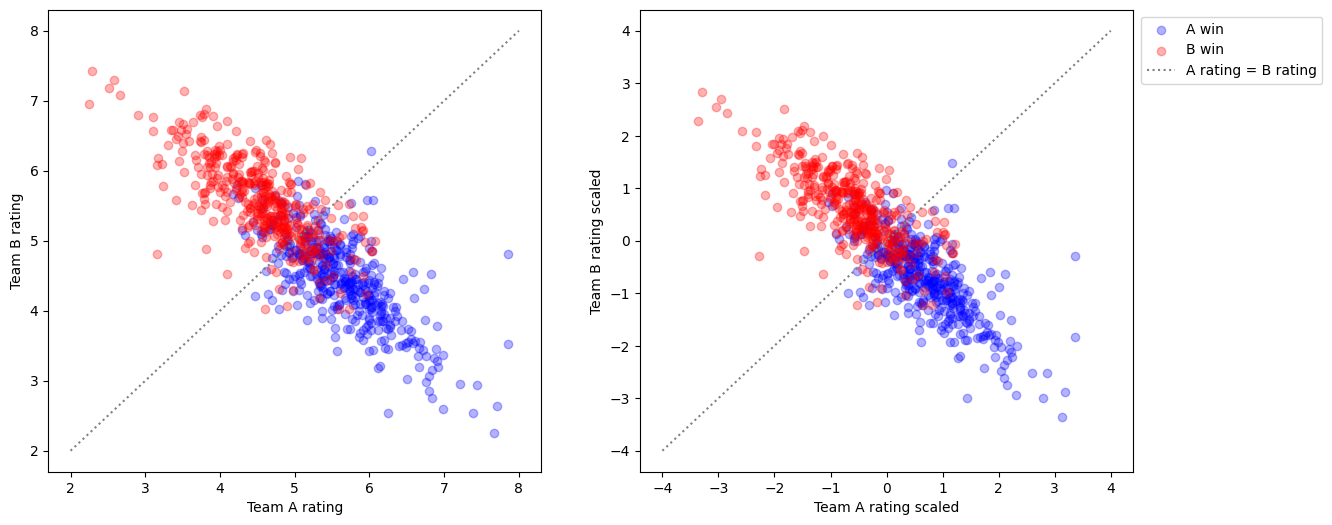

In [42]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)  # row 1, column 2, count 1

plt.scatter(
    final_rating_df[final_rating_df.Team_A_win == True].Team_A_rating,
    final_rating_df[final_rating_df.Team_A_win == True].Team_B_rating,
    c="blue",
    alpha=alpha,
    label = "A win"
)

plt.scatter(
    final_rating_df[final_rating_df.Team_A_win == False].Team_A_rating,
    final_rating_df[final_rating_df.Team_A_win == False].Team_B_rating,
    c="red",
    alpha=alpha,
    label= "B win"
)
plt.plot(range(2,9), range(2,9), linestyle="dotted", color="grey", label="A rating = B rating")
plt.xlabel("Team A rating")
plt.ylabel("Team B rating")

# using subplot function and creating plot two
# row 1, column 2, count 2
plt.subplot(1, 2, 2)
 
plt.scatter(
    scaler.transform(final_rating_df[final_rating_df.Team_A_win == True].Team_A_rating.to_numpy().reshape(-1,1)),
    scaler.transform(final_rating_df[final_rating_df.Team_A_win == True].Team_B_rating.to_numpy().reshape(-1,1)),
    c="blue",
    alpha=alpha,
    label="A win"
)

plt.scatter(
    scaler.transform(final_rating_df[final_rating_df.Team_A_win == False].Team_A_rating.to_numpy().reshape(-1,1)),
    scaler.transform(final_rating_df[final_rating_df.Team_A_win == False].Team_B_rating.to_numpy().reshape(-1,1)),
    c="red",
    alpha=alpha,
    label ="B win"
)

plt.plot(range(-4,5), range(-4,5), linestyle="dotted", color="grey", label="A rating = B rating")
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))

plt.xlabel("Team A rating scaled")
plt.ylabel("Team B rating scaled")
 
plt.show()

In [43]:
print("mean of team A win:", np.mean(final_rating_df.Team_A_win))
print("mean of team B win:", np.mean(final_rating_df.Team_B_win))

mean of team A win: 0.5108433734939759
mean of team B win: 0.4891566265060241


In [45]:
lr = LogisticRegression()
X = final_rating_df[["Team_A_rating", "Team_B_rating"]]
y = final_rating_df.Team_A_win.to_numpy().reshape(-1,1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y)

In [52]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc = accuracy_score(y_test, pred)
print("mean of true value:", np.mean(y_test))
print("mean of prediction:", np.mean(pred))
print("Accuracy:", acc)

mean of true value: 0.5096153846153846
mean of prediction: 0.5240384615384616
Accuracy: 0.8701923076923077


/Users/ahram/miniforge3/envs/vct/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [48]:
raise ValueError("Stop running here!")

ValueError: Stop running here!

`Let's see if ratings before "Valorant Champions 2023" can predict outcome of "Valorant Champions 2023".`

In [49]:
lr2 = LogisticRegression()
W_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2023"][["Team_A_rating", "Team_B_rating"]]
z_train = final_rating_df[final_rating_df["Tournament"] != "Valorant Champions 2023"].Team_A_win.to_numpy().reshape(-1,1)

W_test = chams_2023_team_rating[["Team_A_rating", "Team_B_rating"]]
z_test = chams_2023_team_rating.Team_A_win.to_numpy().reshape(-1,1)

In [50]:
lr2.fit(W_train, z_train)
pred2 = lr2.predict(W_test)
acc2 = accuracy_score(z_test, pred2)
print("mean of true values:", np.mean(z_test))
print("mean of prediction:", np.mean(pred2))
print("Accuracy:", acc2)

mean of true values: 0.5476190476190477
mean of prediction: 0.40476190476190477
Accuracy: 0.5714285714285714


/Users/ahram/miniforge3/envs/vct/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


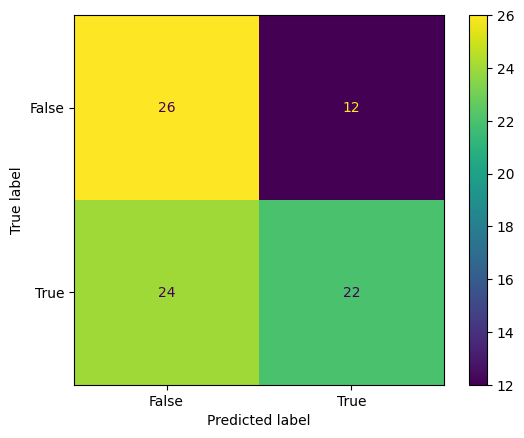

In [51]:
cm2 = confusion_matrix(z_test, pred2, labels=lr2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=lr2.classes_)
disp2.plot()
plt.show()

In [ ]:
raise ValueError("Stop running here!")

In [ ]:
# maps_scores_team_A = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win"]]\
#                     .rename(columns={"Team A":"Team", "Team A Score":"Score", "Team_A_win":"win"})
# maps_scores_team_B = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team B", "Team B Score", "Team_B_win"]]\
#                     .rename(columns={"Team B":"Team", "Team B Score":"Score", "Team_B_win":"win"})
# maps_scores_team_AB = pd.concat([maps_scores_team_A,maps_scores_team_B])

# maps_scores_team_AB

,Tournament,Stage,Match Type,Match Name,Map,Team,Score,win
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,11,False
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,15,False
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,13,False
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,13,True
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,13,True
...,...,...,...,...,...,...,...,...
825,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Ascent,FNATIC,13,True
826,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Fracture,FNATIC,13,True
827,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Split,FNATIC,9,False
828,Champions Tour 2023: Lock-In Sao Paulo,Playoffs,Grand Final,LOUD vs FNATIC,Lotus,FNATIC,8,False


In [ ]:
rating_df_with_result = rating_df.merge(maps_scores_team_AB, on=["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"], how="left")


In [ ]:
rating_df_with_result

In [ ]:
grouped_rating = rating_df_with_result.groupby(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team", "Score", "win"])["Rating"].agg("sum").reset_index()

NameError: name 'rating_df_with_result' is not defined

In [ ]:
grouped_rating

In [ ]:
scores = maps_scores[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win", "Team B", "Team B Score"]]

team_rating_with_scores =\
      scores.set_index(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win"])\
            .join(grouped_rating\
                  .rename(columns={"Team":"Team A", "Score":"Team A Score", "win":"Team_A_win"})\
                  .set_index(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A", "Team A Score", "Team_A_win"])\
            )\
            .reset_index()\
            .rename(columns={"Rating":"Team_A_rating"})\
            .set_index(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team B", "Team B Score"])\
            .join(grouped_rating[["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team", "Score", "Rating"]]\
                  .rename(columns={"Team":"Team B", "Score":"Team B Score"})\
                  .set_index(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team B", "Team B Score"])\
            )\
            .reset_index()\
            .rename(columns={"Rating":"Team_B_rating"})\
            


Let's add grouped_rating to scores.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
A_ratings = team_rating_with_scores["Team_A_rating"]
B_ratings = team_rating_with_scores["Team_B_rating"]
results = team_rating_with_scores["Team_A_win"]

In [ ]:
plt.scatter(
    team_rating_with_scores[team_rating_with_scores["Team_A_win"] == True].Team_A_rating\
    ,team_rating_with_scores[team_rating_with_scores["Team_A_win"] == True].Team_B_rating\
    ,c="blue"
    )\
    
# plt.scatter(
#     team_rating_with_scores[team_rating_with_scores["Team_A_win"] == False].Team_A_rating\
#     ,team_rating_with_scores[team_rating_with_scores["Team_A_win"] == False].Team_B_rating\
#     ,c="red"
#     )\

plt.xlabel("Team A rating")
plt.ylabel("Team B rating")
plt.show()

In [ ]:
plt.scatter(
    team_rating_with_scores[team_rating_with_scores["Team_A_win"] == False].Team_A_rating\
    ,team_rating_with_scores[team_rating_with_scores["Team_A_win"] == False].Team_B_rating\
    ,c="red"
    )\

plt.xlabel("Team A rating")
plt.ylabel("Team B rating")
plt.show()

I want to join rating_df to scores

In [ ]:
# scores.merge(rating_df, how="right", on=["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team"])
scores_with_rating =\
  scores.set_index(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A"])\
          .join(rating_df\
                .rename(columns={"Team": "Team A"})\
                  .set_index(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team A"])\
                      )\
                      .reset_index()\
                      .rename(columns={"Player":"A_player", "Agents":"A_agents","Rating":"A_player_rating","Rounds Played":"A_rounds_played"})\
          .set_index(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team B"])\
              .join(rating_df\
                .rename(columns={"Team": "Team B"})\
                  .set_index(["Tournament", "Stage", "Match Type", "Match Name", "Map", "Team B"])\
                      )\
                      .reset_index()\
                      .rename(columns={"Player":"B_player", "Agents":"B_agents","Rating":"B_player_rating","Rounds Played":"B_rounds_played"})\
                    


In [ ]:
scores_with_rating.head(20)

In [ ]:
scores_with_rating.keys()

In [ ]:
scores_with_rating.groupby(['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', "Team A", "Team A Score", "Team B Score", "Team_A_win"]).agg("count")

In [ ]:
test_df_A = scores_with_rating[['Tournament', 'Stage', 'Match Type', 'Match Name', 'Map', "Team A", "Team A Score", "A_player", "A_player_rating", "Team_A_win"]]

test_df_A

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib as plt

In [ ]:
plt.scatter

In [ ]:
# df = pd.DataFrame({ 
#     'A': [1, 1, 1, 2, 2, 2, 4], 
#     'B': [10, 10, 10, 12, 12, 13, 14], 
#     'C': [5, 3, np.nan, 8, np.nan, np.nan, 9],
#     'D': [np.nan, 1, 0, np.nan, np.nan, 0, 1]
# })
# # grouped = df.groupby(["A", "B"])
# # mean_values = grouped.mean()
# # mean_values

# grouped = df.groupby(["A", "B"])
# display(df)
# df["C"] = grouped["C"].transform(lambda x : x.fillna(x.mean()))
# df